# Christopher Godfrey Scientific Computing Portfolio.
This portfolio is the result of my work done within the 2018 semester for Computational Methods in Physics (PHYS 1321) taught by Dr. David Nero at the University of Pittsburgh. The following is a compilation of short projects that show off all the skills that I know for Scientific Comptuting within Python in which I can apply to any given task.

Any issues with the portfolio can be emailed to me at ctg18@pitt.edu. This portfolio was made with Python 3.6.7.

# Electron Energy Levels
Pretty much, this is a simple forumla used to compute the energy levels of an electron. It is a practice of some of the basic formatting skills such as producing file outputs with a certain format. What this code does is taking a formula for electron energy levels, outputs it to an external text file. It then reads that text file.

In [1]:
#This cell did not need any imports.

def energy(Z, n): # Here I define the simple function that find the energy
    assert Z > 0 and type(Z) is int and n > 0 and type(n) is int
    E = -(13.6)*(((Z)**2)/((n)**2))
    return E

def levels(Zmin, Zmax, nmin, nmax): #this function organizes the energy into energy levels and formats them into a text file.
    
    f= open("energy_levels.txt","w+")
    
    heading = ' z'
    nvalue = ''
    
    for n in range(nmin, nmax+1): #this for loop creates the heading that is dependent on the number of n levels
        n = str(n)
        nvalue =(nvalue+"       n="+n)
    heading = (heading+""+nvalue)
    
    f.write(heading+'\n')
    for Z in range (Zmin, Zmax+1):
        string = ""
        A=f"{Z:>2}"
        for n in range(nmin, nmax+1):
            string += f"  {energy(Z,n):>8.2f}" #This builds the string 
        f.write(A+string+'\n')
    f.close()
        
levels(1, 10, 1, 5)

with open("energy_levels.txt") as file:
    print(file.read())

 z       n=1       n=2       n=3       n=4       n=5
 1    -13.60     -3.40     -1.51     -0.85     -0.54
 2    -54.40    -13.60     -6.04     -3.40     -2.18
 3   -122.40    -30.60    -13.60     -7.65     -4.90
 4   -217.60    -54.40    -24.18    -13.60     -8.70
 5   -340.00    -85.00    -37.78    -21.25    -13.60
 6   -489.60   -122.40    -54.40    -30.60    -19.58
 7   -666.40   -166.60    -74.04    -41.65    -26.66
 8   -870.40   -217.60    -96.71    -54.40    -34.82
 9  -1101.60   -275.40   -122.40    -68.85    -44.06
10  -1360.00   -340.00   -151.11    -85.00    -54.40



# Plotting Electric Potential 1-D Model
Here given a formula for potential energy I first plot a 1-D model. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

k = 8.99e9

def potential1D(r, q): #function that defines the potential energy
    V = k*q/r
    return V

#All of this plots the graph
r = np.linspace(0, 10, 100)
q = -1e-9
plt.plot(potential1D(r, q), color='r')
plt.ylim(-100, 0)
plt.xlabel("r (radius)")
plt.ylabel("V(r)")
plt.title("Potential Energy vs. Radius") #supresses the run time warning
plt.grid()
np.seterr(all="ignore")
plt.show()

C:\Users\godfr\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


<Figure size 640x480 with 1 Axes>

# Plotting Electric Potential 2-D Model Single Charge
Here, I plot the the 2-D model for potential energy using more advanced plotting techiques. It results in a density graph that contains contours.

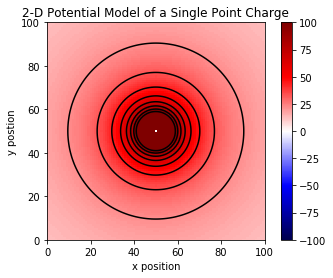

In [3]:
import numpy as np
import matplotlib.pyplot as plt

k = 8.99e9

def potential2D(x, y, q, x0, y0): #Here I define the function to find the potential Energy
    V = k*q/(np.sqrt((x-x0)**2+(y-y0)**2))
    np.seterr(all="ignore")
    return V

x0 = 0.5 #Here I set the conditions which I will enter into the function
y0 = 0.5
q = 1e-9
x = np.linspace(0,1,101)
y = np.linspace(0,1,101)

x,y = np.meshgrid(x,y) #I form a 2-D array with this line

V = potential2D(x, y, q, x0, y0)

#I graph everything using the code below.
plt.imshow(V, cmap='seismic',interpolation='nearest', vmin='-100',vmax='100')
plt.colorbar()
plt.title("2-D Potential Model of a Single Point Charge")
plt.contour(V, levels=np.linspace(0,100,10), colors="black")
plt.ylim(0,100)
plt.ylabel('y postion')
plt.xlim(0,100)
plt.xlabel('x position')
plt.show()

# Plotting Electric Potential 2-D Model for a Multiple Charge System
Using Similar Techniques as the single charge model that I used earlier but instead of a single charge system, I used a system of random charges. Run the notebook here to test it out!

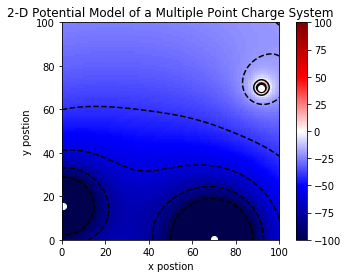

In [4]:
import numpy as np
import matplotlib.pyplot as plt

k = 8.99e9

def potential2D(x, y, q, x0, y0): #Here I define the function to find the potential Energy for a 2-D model
    V = k*q/(np.sqrt((x-x0)**2+(y-y0)**2))
    np.seterr(all="ignore")
    return V

def V_plot(q1, x1, y1, q2, x2, y2, q3, x3, y3): #A new function was created that has inputs for 
    x = np.linspace(0,1,101)
    y = np.linspace(0,1,101)

    x,y = np.meshgrid(x,y)

    V1 = potential2D(x, y, q1, x1, y1) #This part determins the potential by putting it into a previously defined function
    V2 = potential2D(x, y, q2, x2, y2)
    V3 = potential2D(x, y, q3, x3, y3)
    
    VT = V1+V2+V3 #This function determines the toal magnitude of the potential since potential is a scalar quantity.
    
    #below is graphing and formatting.
    plt.ylim(0,100)
    plt.ylabel('y postion')
    plt.xlim(0,100)
    plt.xlabel('x postion')
    
    plt.plot(x1*100, y1*100, 'o', color='white')
    plt.plot(x2*100, y2*100, 'o', color='white')
    plt.plot(x3*100, y3*100, 'o', color='white')
    plt.title("2-D Potential Model of a Multiple Point Charge System")
    plt.contour(VT, levels=np.arange(-100,100,20), colors="black")
    plt.imshow(VT,cmap='seismic',interpolation='nearest',vmin='-100',vmax='100')
    plt.colorbar()
    plt.show()
    
import random #Here is a generation of of random points and charge magnitudes. 
q1 = random.uniform(-2e-9, 2e-9)
q2 = random.uniform(-2e-9, 2e-9)
q3 = random.uniform(-2e-9, 2e-9)
x1 = random.uniform(0, 1)
x2 = random.uniform(0, 1)
x3 = random.uniform(0, 1)
y1 = random.uniform(0, 1)
y2 = random.uniform(0, 1)
y3 = random.uniform(0, 1)

V_plot(q1, x1, y1, q2, x2, y2, q3, x3, y3)

# 2-D Waves Represented with Interactive Widgets
Using widgets and a given equation for 2-D waves, I plot the 2-D wave function. Try adjusting the widgets to test.

In [5]:
#You must run this cell to see the results
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython import display
from matplotlib.animation import FuncAnimation
from IPython import display

def wave(t, z0, k, w): #Here I define the function
    x = np.linspace(-10,10,500)
    y = np.linspace(-10,10,500)
    x,y =np.meshgrid(x,y)
    z = z0*np.sin(k*np.sqrt(x**2+y**2)-w*t)
    return z

slider1 = widgets.IntSlider(min=1,max=10,step=1,value=1)
slider2 = widgets.IntSlider(min=1,max=10,step=1,value=1)
slider3 = widgets.IntSlider(min=1,max=10,step=1,value=1)

def graph(z0,k,w): #This function graphs the plot every time a slider is adjusted
    plt.xlim(0,500)
    plt.ylim(0,500)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.imshow(wave(0,z0,k,w),cmap='hot',vmin='-1',vmax='1')
    plt.colorbar()
    
gui = widgets.interactive(graph, z0=slider1, k=slider2, w=slider3)
display.display(gui)

#must run and adjust sliders to see results

interactive(children=(IntSlider(value=1, description='z0', max=10, min=1), IntSlider(value=1, description='k',…

# 2-D Waves Represented with an Animation
Instead of interactive widgets, a real time animation set with hardlocked values for each value in the equation.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython import display
from matplotlib.animation import FuncAnimation
from IPython import display

def wave(t, z0, k, w): #The function that defines the 2-D wave.
    x = np.linspace(-10,10,500)
    y = np.linspace(-10,10,500)
    x,y =np.meshgrid(x,y)
    z = z0*np.sin(k*np.sqrt(x**2+y**2)-w*t)
    return z

progress = display.ProgressBar(50) #Progress bar for convenience
progress.display()

fig = plt.figure()
plt.xlim(0,500)
plt.ylim(0,500)
def animate(frame):
    plt.imshow(wave(frame/10,1,1,10),cmap='hot',vmin='-1',vmax='1')## I divided the frame by the interval otherwise I would have gotten a superfast animation
    progress.progress = frame+1 #The frame divided by 10 gives me the animation in real time for every second
    
anim = FuncAnimation(fig, animate, frames=50, interval=20)
video = anim.to_html5_video()
plt.close()
display.clear_output(wait=True)
display.HTML(video)


# Electric Field of a Charge Distribution
Using the relations between potential, I used methods of integration associated with the integration packackage to find the electric potential of a 2-D charge distribution. Using the numpy's gradient method, this code then calculate the Electric Field across the distribution and represents it using a quiver plot.

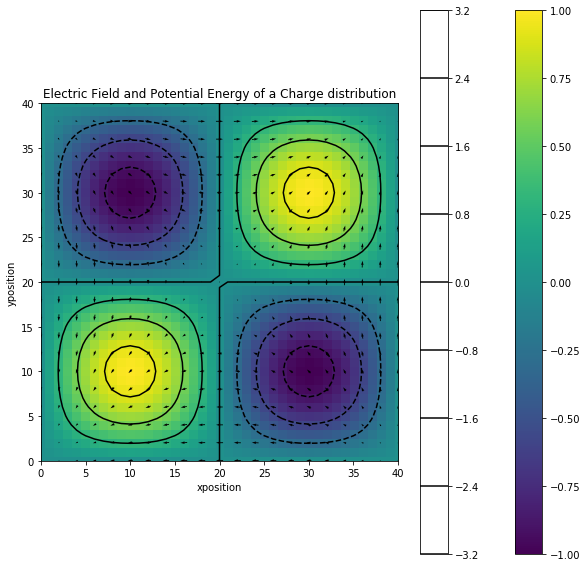

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

def simps2D(f,L): #Here is the function that I use to integrate 2-D functions using Simpsons Rule
    
    xrange = np.linspace(-L,L,200)
    yrange = np.linspace(-L,L,200)
    
    x, y = np.meshgrid(xrange,yrange)
    
    I1 = integrate.simps(f(x,y),xrange)
    I2 = integrate.simps(I1,yrange)
    
    return I2

def potential(sigma, x , y): #Here I sent the function to determine the potential energy.
    Integrand = lambda a, b: sigma(a,b)/(np.sqrt((x-a)**2+(y-b)**2))
    V = simps2D(Integrand, 10)
    return V

def sigma(x,y): #Here is the charge distribution 
    return np.sin(np.pi*x/2)*np.sin(np.pi*y/2)

x = np.linspace(-2,2, 41)
y = np.linspace(-2,2, 41)

x, y  = np.meshgrid(x,y)

h = 0.1

xr = np.linspace(-2,2,41)
yr = np.linspace(-2,2,41)

x1, y1 = np.meshgrid(xr, yr)

V = np.empty((len(xr),len(yr)))#This builds a 2-D array of voltages
for i in range(0, len(xr)):
    for j in range(0, len(yr)):
        V[i,j] = potential(sigma, xr[i], yr[j])
    

Ex, Ey = np.gradient(V) #This defines the gradient
Ex = -Ex # since E = -del(V) I set the compoentns to negative for each
Ey = -Ey

#Down below I do some graphing

plt.figure(figsize=(10,10))
plt.quiver(20*xr, 20*yr, Ex, Ey, pivot="middle")
plt.imshow(sigma(x,y), origin='lower')
plt.colorbar()
plt.contour(V,colors='black')
plt.colorbar()
plt.title('Electric Field and Potential Energy of a Charge distribution')
plt.xlim(0,40)
plt.ylim(0,40)
plt.xlabel('xposition')
plt.ylabel('yposition')
plt.show()

# Using Linear Algebra to Determine and Animate Eigenfrequencies

Using scipy's linear alebra package, I animated each of the four eigenfrequencies for a 4 mass system with each being attached to a separate spring which in terms are found between two vertical walls. Here is the code below

In [8]:
import numpy as np #Imports necessary to achieve the goal.
import scipy.linalg as linalg
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 
from IPython import display 

#derivative
#WRT x0: k*(2x0-x1)
#WRT x1: k*(2*x1-x2-x0)
#WRT x2: k*(2*x2-x1-x3)
#WRT x3: k*(2*x3-x2)

#Here I found all the intial condition values
M = np.array([[2,-1,  0, 0],
             [-1, 2, -1, 0],
             [0, -1,  2,-1],
             [0,  0, -1, 2]])

eigenfrequency, eigenvectors = linalg.eigh(M) #Here I 

eigenvector = eigenvectors.transpose()

eigfreq1 = np.sqrt(eigenfrequency[0]) #he eigenfrequency vector needs to be convereted which I do here
eigfreq2 = np.sqrt(eigenfrequency[1])
eigfreq3 = np.sqrt(eigenfrequency[2])
eigfreq4 = np.sqrt(eigenfrequency[3])

eigvec1 = eigenvector[0]
eigvec2 = eigenvector[1]
eigvec3 = eigenvector[2]
eigvec4 = eigenvector[3]

print("The first eigenfrequency is", eigfreq1," Hz")
print("The second eigenfrequency is", eigfreq2," Hz")
print("The third eigenfrequency is", eigfreq3," Hz")
print("The fourth eigenfrequency is", eigfreq4," Hz")

def draw_spring(xi, xf):
    """
    Draws a horizontal spring.
    Inputs: xi = inital x-coordinate
            xf = final x-coordinate
    """
    dy = 0.5
    x = np.linspace(xi, xf, 23)
    y = np.array([0]*4 + [dy, 0, -dy, 0]*4 + [0]*3)
    spring = plt.Line2D(x, y, linestyle="-", color="gray", zorder=-1)
    ax = plt.gca()                      #                        ^
    ax.add_line(spring)                 # draw behind everything else


def draw_chain(x_offsets):
    """
    Draw a chain of five springs and four masses.
            x_offsets = Sequence of displacements from equilibrium position.
    """
    x = np.arange(2, 10, 2) + x_offsets
    
    # draw springs
    draw_spring(0, x[0],)
    draw_spring(x[0], x[1])
    draw_spring(x[1], x[2])
    draw_spring(x[2], x[3])
    draw_spring(x[3], 10)
    
    # draw masses
    plt.plot(x, [0, 0, 0, 0], "ko", ms=8)
    
fig = plt.figure()
plt.axis("scaled")
plt.axis("off")
plt.vlines([0, 10], -1, 1, "k", lw=5)

#This function is the the function at which the the systems moves
def motion(A,w,t):
    return A*np.sin(w*t)

def animate(frame):
    
    fig.clear()
    
    x1 = motion(eigvec1[0],eigfreq1, frame)
    x2 = motion(eigvec1[1],eigfreq1, frame)
    x3 = motion(eigvec1[2],eigfreq1, frame)
    x4 = motion(eigvec1[3],eigfreq1, frame)
    
    plt.subplot(2,2,1)
    draw_chain([x1,x2,x3,x4])
    plt.axis("scaled")
    plt.title("eigenfrequency 1")
    plt.axis("off")
    plt.vlines([0, 10], -1, 1, "k", lw=5)
    
    x1 = motion(eigvec2[0],eigfreq2, frame)
    x2 = motion(eigvec2[1],eigfreq2, frame)
    x3 = motion(eigvec2[2],eigfreq2, frame)
    x4 = motion(eigvec2[3],eigfreq2, frame)
    
    plt.subplot(2,2,2)
    draw_chain([x1,x2,x3,x4])
    plt.axis("scaled")
    plt.title("eigenfrequency 2")
    plt.axis("off")
    plt.vlines([0, 10], -1, 1, "k", lw=5)
    
    x1 = motion(eigvec3[0],eigfreq3, frame)
    x2 = motion(eigvec3[1],eigfreq3, frame)
    x3 = motion(eigvec3[2],eigfreq3, frame)
    x4 = motion(eigvec3[3],eigfreq3, frame)
    
    plt.subplot(2,2,3)
    draw_chain([x1,x2,x3,x4])
    plt.axis("scaled")
    plt.title("eigenfrequency 3")
    plt.axis("off")
    plt.vlines([0, 10], -1, 1, "k", lw=5)
    
    x1 = motion(eigvec4[0],eigfreq4, frame)
    x2 = motion(eigvec4[1],eigfreq4, frame)
    x3 = motion(eigvec4[2],eigfreq4, frame)
    x4 = motion(eigvec4[3],eigfreq4, frame)
    
    plt.subplot(2,2,4)
    draw_chain([x1,x2,x3,x4])
    plt.axis("scaled")
    plt.title("eigenfrequency 4")
    plt.axis("off")
    plt.vlines([0, 10], -1, 1, "k", lw=5)
        
anim = FuncAnimation(fig, animate, frames=80, interval=100)
video = anim.to_html5_video()
plt.close()
display.HTML(video)


The first eigenfrequency is 0.6180339887498988  Hz
The second eigenfrequency is 1.1755705045849467  Hz
The third eigenfrequency is 1.6180339887498953  Hz
The fourth eigenfrequency is 1.902113032590307  Hz


# Larange Points
Using the minimization methods, This code represents the Earth-Moon System in graphical form through the use of contours that represent that potential energy and specific points that represent the Larangian Points.

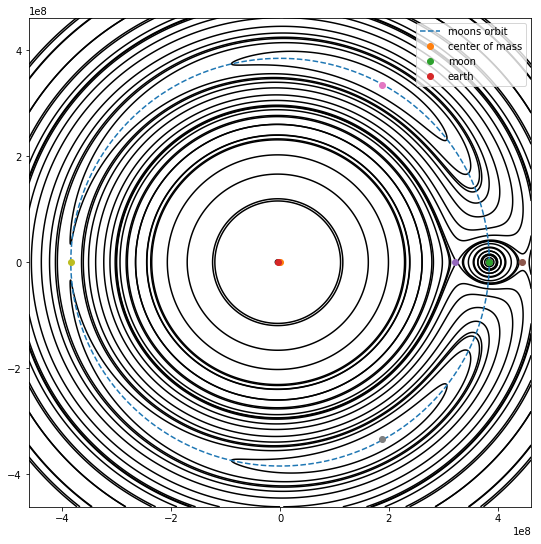

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import ipywidgets as widgets
import scipy.optimize as optimize

G = 6.674e-11
Me = 5.974e24 #Earth's mass
mm =7.348e22 #moon's mass
w = 2.662e-6
R = 3.844e8



def com(a): 
    co = (Me*a+mm*R)/(Me+mm)
    return a
    

xe = -4728107.13+400000
xm = R 
ye = 0
ym = 0

theta = np.linspace(0, 2*np.pi, 1000)
x1 = R*np.cos(theta)
x2 = R*np.sin(theta)

def potential(x, y):
    r = np.sqrt(x**2+y**2)
    re = np.sqrt((x-xe)**2+(y-ye)**2)
    rm = np.sqrt((x-xm)**2+(y-ym)**2)
    V = -G*Me/re-G*mm/rm-0.5*(r**2)*w**2
    return V

xr = np.linspace(-1.2*R,1.2*R,1000)
yr = np.linspace(-1.2*R,1.2*R,1000)

x, y = np.meshgrid(xr,yr)

V = potential(x,y)

level = np.arange(0, -1.2*R, 5)
level.sort()

z = np.linspace(0, 1.2*R,5)#Adjusting the last number changes the number of lines drawn

for i in range(0,len(z)): #This function builds an array of potentials for an even distribution of potentials
    for j in range(0,len(z)):
        a = z[i]
        b = z[j]
        level = np.append(level,potential(a,b))
level.sort()

def F(xy): #I used this to find the Larange points one by one and I just hardcoded them in because I thought it would be easier
    x, y = xy
    return -(G*Me*(x-xe)/(((x-xe)**2+(y-ye)**2)**(3/2))+G*mm*(x-xm)/(((x-xm)**2+(y-ym)**2)**(3/2))-x*w**2)+(G*Me*(y-ye)/(((x-xe)**2+(y-ye)**2)**(3/2))+G*mm*(y-ym)/(((x-xm)**2+(y-ym)**2)**(3/2))-y*w**2)

guess = (0, 0)
L = optimize.minimize(F, guess,method='Powell')
L1 = L.x

xa= 3.21788459e8 #All the Larange points
ya = 0
xb = 4.44409946e8
yb = 0
xc, yc = 1.87529342e8, 3.33307200e8
xd, yd = 1.87529342e8, -3.33307200e8
xf, yf = -R, 0

plt.figure(figsize=(9,9))
plt.plot(x1,x2, label = 'moons orbit', linestyle='dashed')
plt.plot(0,0, "o", label='center of mass')
plt.plot(xm,ym, "o", label='moon')
plt.plot(xe,ye, "o", label='earth')
plt.plot(xa,ya, "o")
plt.plot(xb,yb, "o")
plt.plot(xc,yc, "o")
plt.plot(xd,yd, "o")
plt.plot(xf,yf, "o")

#plt.plot(L5, "o")
#plt.xlim(-1.2*R,1.2*R)
#plt.ylim(-1.2*R,1.2*R)
plt.contour(x, y, V,levels=level,colors='black',linestyles='solid')
plt.legend()
plt.show()


# Fourier Transform of a Simple Sound File
Here using the fftpack, I did a fourier analysis on multiple sound files in which I got to the point where I was able to cut down tracks of sound files and eventually identify indvidual notes based on their freuencies

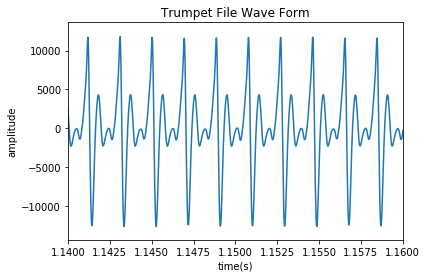

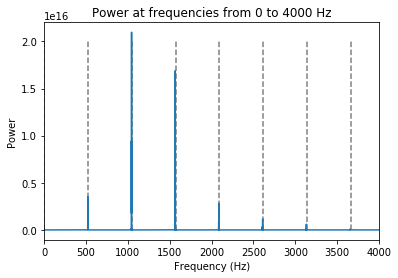

In [10]:
import IPython.display as display
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack
import ipywidgets as widgets
import IPython.display as display

def _download(filename):
    """
    Download data file from the Internet and save it in the working directory
    """
    import os
    import urllib.request as url
    if not os.path.isfile(filename):
        url.urlretrieve(f"http://www.pitt.edu/~djn23/phys1321/{filename}", filename) #Code to import the files
        
_download("trumpet.txt")

trumpet = np.loadtxt('trumpet.txt')

rate = 44100
N = len(trumpet)

time = N/rate

t = np.linspace(0,time,N)

plt.plot(t,trumpet)
plt.xlim(1.14,1.16)# plotted at a closer point so the waveform can be seen better
plt.ylabel('amplitude')
plt.xlabel('time(s)')
plt.title("Trumpet File Wave Form")
plt.show()

display.Audio(trumpet, rate=44100)

ck = fftpack.fft(trumpet)
power_spectrum = (abs(ck))**2

dt = 1/rate #seconds per sample
df = 1/(dt*N)

freq = np.arange(0, 1/dt, df)

vlin = np.array([])# code to check spacing
for i in range(0,10):
    if (i*523.251<4000):
        vlin = np.append(vlin,i*523.251)
    else:
        break  

plt.plot(freq, power_spectrum) 
plt.title("Power at frequencies from 0 to 4000 Hz")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.xlim(0,4000)
plt.vlines(vlin,0,2e16,linestyle='dashed', color='gray') #lines are confirmed to line up
plt.show()

# Analysis of a Complex Sound File Involving Multiple Frequencies
Here I did an analysis of the first chord of the main theme from star wars and determined all the identifiable notes based on their frequencies. Here, it takes a sound file, plots its wave form, then plots the power spectrum which I then used to find specfic frequencies.

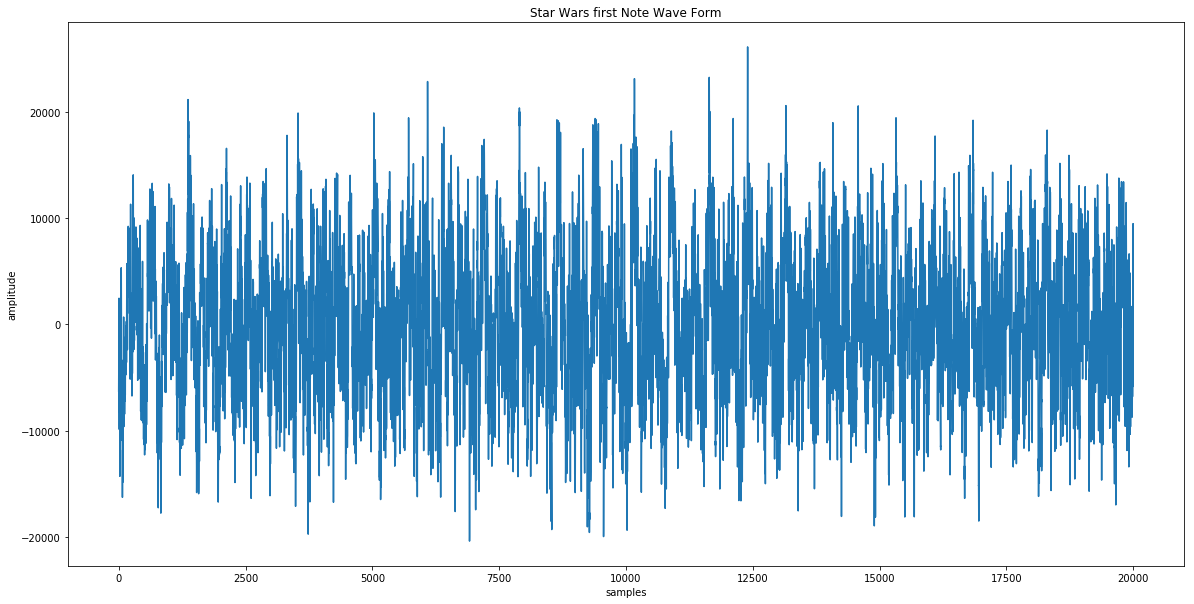

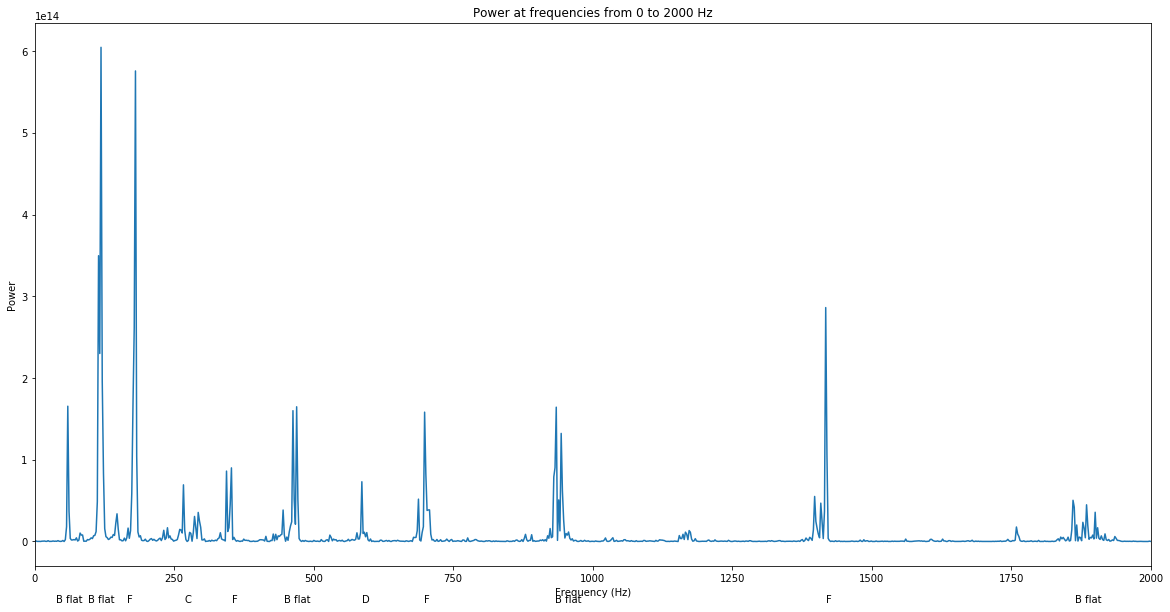

The most noticeable notes where B flat, D, F, and C which were confirmed to be the fall within the B flat scale and confirmed to be making up the first chord


In [11]:
_download("StarWars.wav")
display.Audio("StarWars.wav")

from scipy.io.wavfile import read as wavread
from scipy.io import wavfile
rate, data = wavread("StarWars.wav")

def Jedi(a,b): 
    c1 = data[a:]
    c2= c1[:b]
    plt.plot(c2)
    plt.show()
    return c2

data = data[25000:45000]
plt.figure(figsize=(20,10))
plt.xlabel("samples")
plt.ylabel("amplitude")
plt.title("Star Wars first Note Wave Form")

plt.plot(data)

ck = fftpack.fft(data)
power_spectrum = (abs(ck))**2

N = len(data)

dt = 1/rate #seconds per sample
df = 1/(dt*N)

freq = np.arange(0, 1/dt, df)

vlin = np.array([])# code to check spacing

plt.figure(figsize=(20,10))

plt.plot(freq, power_spectrum) #Static Graph for grading purposes
plt.title("Power at frequencies from 0 to 2000 Hz")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.xlim(0,2000)
plt.text(116.5409-20,-0.75e14,"B flat")
plt.text(184.9972-20,-0.75e14,"F")
plt.text(466.1638-20,-0.75e14,"B flat")
plt.text(58.27047-20,-0.75e14,"B flat")
plt.text(353,-0.75e14,"F")
plt.text(586,-0.75e14,"D")
plt.text(932,-0.75e14,"B flat")
plt.text(697,-0.75e14,"F")
plt.text(268,-0.75e14,"C")
plt.text(1419,-0.75e14,"F")
plt.text(1865,-0.75e14,"B flat")#The oddball out but its okay since C is in the B flat scale.
plt.show()

#I recorded peaks around 0.5e14, which would be the main brute force chord, anything else could be result of multitude of factors
#such as slightly out tune instruments, vibrating drum heads and strings from the louder sounds and any other background noise.

print("The most noticeable notes where B flat, D, F, and C which were confirmed to be the fall within the B flat scale and confirmed to be making up the first chord")


# Animating a Double Pendulum and Determining its Energy.
Here using the Runge Kutta Method, I solved a system of two first order odes in order to determine the the angles of motion at certain time steps of a double pendulum. Using that information, I animated the results.

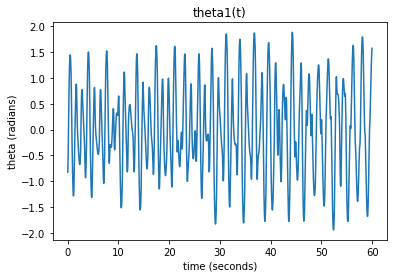

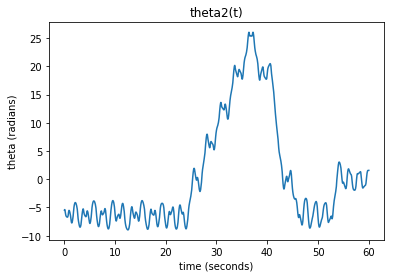

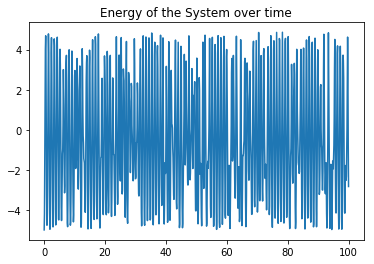

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import IPython.display as display
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint

def RK4(f, x, t, h):
    k1 = h*f(x, t)
    k2 = h*f(x + k1/2, t + h/2)
    k3 = h*f(x + k2/2, t + h/2)
    k4 = h*f(x + k3, t + h)
    return x + (k1 + 2*k2 + 2*k3 + k4)/6

# 7 points
g = 9.8
l = 0.40
def f(r, t): #The function that outputs the first order versions of this equation
    th10, th20, w10, w20 = r
    dth1 = w10
    dth2 = w20
    dw1 = -(w10**2*np.sin(2*th10-2*th20)+2*w20**2*np.sin(th10-th20)+(g/l)*(np.sin(th10-2*th20)+3*np.sin(th10)))/(3-np.cos(2*th10-2*th20))
    dw2 = (4*w10**2*np.sin(th10-th20)+w20**2*np.sin(2*th10-2*th20)+2*(g/l)*(np.sin(2*th10-th20)-np.sin(th20)))/(3-np.cos(2*th10-2*th20))
    return np.array([dth1, dth2, dw1, dw2])

a = 60 #Sets the intial conditions
b = 0
N = 1400 #Number of points intially, 1000 was not enough and 1500 appeared to be too much.
h = (b-a)/N
t = np.arange(a, b, h)
th10, th20, w10, w20 = np.pi/2, np.pi/2, 0, 0

th1 = []
th2 = []
w1 = []
w2 = []

for i in range(0, len(t)): #for loop that runs through the runge-kutta method
    th1.append(th10)
    th2.append(th20)
    w1.append(w10)
    w2.append(w20)
    r = (th10, th20, w10, w20)
    th10, th20, w10, w20 =RK4(f, r, t[i], h)

th1 = np.asarray(th1)
th2 = np.asarray(th2)
w1 = np.asarray(w1)
w2 = np.asarray(w2)

plt.plot(t, th1)
plt.title("theta1(t)")
plt.ylabel("theta (radians)")
plt.xlabel("time (seconds)")
plt.show()

plt.plot(t, th2)
plt.title("theta2(t)")
plt.ylabel("theta (radians)")
plt.xlabel("time (seconds)")
plt.show()

##Here I solved for energy of the system.
m = 1
th10, th20, w10, w20 = np.pi/2, np.pi/2, 0, 0

t = np.linspace(0,100,1000)

r0 = (np.pi/2,np.pi/2,0,0)

r = odeint(f,r0,t)

th1, th2, w1, w2 =r.T


E = m*l**2*(w1**2+0.5*w2**2+w1*w2*np.cos(th1-th2)-m*g*l*(2*np.cos(th1)+np.cos(th2)))-5

plt.plot(t, E)
plt.title("Energy of the System over time")
plt.show()

Here I animated the final results

In [13]:
# 7 points
g = 9.8
l = 0.40
def f(r, t):
    th10, th20, w10, w20 = r
    dth1 = w10
    dth2 = w20
    dw1 = -(w10**2*np.sin(2*th10-2*th20)+2*w20**2*np.sin(th10-th20)+(g/l)*(np.sin(th10-2*th20)+3*np.sin(th10)))/(3-np.cos(2*th10-2*th20))
    dw2 = (4*w10**2*np.sin(th10-th20)+w20**2*np.sin(2*th10-2*th20)+2*(g/l)*(np.sin(2*th10-th20)-np.sin(th20)))/(3-np.cos(2*th10-2*th20))
    return np.array([dth1, dth2, dw1, dw2])

a = 60
b = 0
N = 1400 #Number of points intially, 1000 was not enough and 1500 appeared to be too much.
h = (b-a)/N
t = np.arange(a, b, h)
th10, th20, w10, w20 = np.pi/2, np.pi/2, 0, 0

th1 = []
th2 = []
w1 = []
w2 = []

for i in range(0, len(t)): #for loop that incorporates the RK4 methods
    th1.append(th10)
    th2.append(th20)
    w1.append(w10)
    w2.append(w20)
    r = (th10, th20, w10, w20)
    th10, th20, w10, w20 =RK4(f, r, t[i], h)

th1 = np.asarray(th1)
th2 = np.asarray(th2)
w1 = np.asarray(w1)
w2 = np.asarray(w2)

################################################################################################################################
    
def th_point(a,b): #This function takes an theta value transforms it to the x, y location for the mass
    x1 = l*np.sin(a)
    y1 = -l*np.cos(a)
    x2 = x1+l*np.sin(b)
    y2 = y1-l*np.cos(b) 
    return x1, x2, y1, y2

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
plt.grid()
#line, = plt.plot([], [], 'o-', lw=2)

theta1 = np.array([])
theta2 = np.array([])

i = 0

while (i < len(t)): #while loop to cut down the arrays so there isn't so mmany frames
    theta1 = np.append(theta1,th1[i])
    theta2 = np.append(theta2,th2[i])
    i = i+1 #number can be adjusted at end to make more or less frames.

x1, x2, y1, y2 = th_point(theta1, theta2)

progress = display.ProgressBar(len(theta1)) 
progress.display()

def animate(frame):
    fig.clear()
    x = np.array([0,x1[frame],x2[frame]])
    y = np.array([0,y1[frame],y2[frame]])
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.grid()
    plt.plot(x, y, "-o")
    progress.progress = frame+1

#takes about a minutes 1:20 for me and I have a powerful desktop computer.
    

anim = FuncAnimation(fig, animate, frames=len(theta1), interval=a/N*1000)
video = anim.to_html5_video()
plt.close()
display.clear_output(wait=True)
display.HTML(video)

# Standing Waves on a String
Here using the crank-nichlson method, I represent a vibrating string. I then modify the code in order to to apply dampening along with a time dependent frequency 

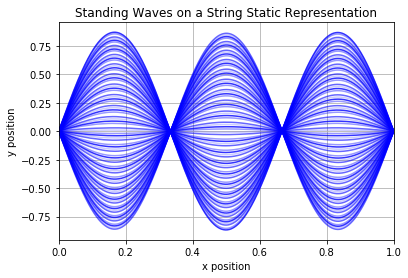

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded
from scipy.fftpack import dst, idst
from matplotlib.animation import FuncAnimation
import IPython.display as display

L, v, N = 1, 10, 1000
a = 1e-3 #grid spacing
x = np.linspace(0, L, N+1) #N is actually deciding the grid spacing through the use of linspace

h = 1e-3 #step size
time = np.arange(0, 10, h) 
y0=0.01
v=10

w=3*np.pi*v/L #driving frequency
y = np.zeros(N+1)
vy =0.01*w*np.ones(N+1) #intial conditions

A = np.empty((3, N-1)) #defining some array values.
A[0] = -(0.25*h**2*v**2/a**2)
A[1] = 1+2*(0.25*h**2*v**2/a**2)
A[2] = -(0.25*h**2*v**2/a**2)

list_1 = []
for i, t in enumerate(time): #The Crank-Nicholson Loop
    list_1.append(y.copy())
    yold=y.copy()
    vyold=vy.copy()
    y[0]=0.01*np.sin(w*t)
    vy[0]=y0*w*np.cos(w*t)
    d=(0.25*h**2*v**2/a**2)*y[:-2]+(1-2*(0.25*h**2*v**2/a**2))*y[1:-1]+(0.25*h**2*v**2/a**2)*y[2:]+h*vy[1:-1]
    y[1:N] = solve_banded((1,1), A, d) 
    vy[1:-1]+=2*(0.25*h**2*v**2/a**2)/h*(y[:-2]+y[2:]-2*y[1:-1]+yold[:-2]+yold[2:]-2*yold[1:-1])
wave_part1=y #

# 2 points
plot=np.linspace(0,L,1001)
for i in range(0,len(list_1)//100):
    plt.plot(plot,list_1[100*i],color="blue",alpha=0.2*(i%5))

plt.xlim(0,1)
plt.title("Standing Waves on a String Static Representation")
plt.xlabel("x position")
plt.ylabel("y position")
plt.grid()
plt.show()

The next part, I applied a dampening effect along with a time dependent frequency. I then used that to create an animation.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded
from scipy.fftpack import dst, idst
from matplotlib.animation import FuncAnimation
import IPython.display as display

L, v, N = 1, 10, 100
a = 1e-2 #grid spacing a little larger by a factor of 100
x = np.linspace(0, L, N+1) #N is actually deciding the grid spacing through the use of linspace
b=1e-6
h = 1e-3
time = np.arange(0, 10, h) 
y0=0.01
v=10
w=3*np.pi*v/L
y = np.zeros(N+1)
vy =0.01*w*np.ones(N+1)

A = np.empty((3, N-1))
A[0] = -(0.25*h**2*v**2/a**2)
A[1] = 1+2*(0.25*h**2*v**2/a**2)
A[2] = -(0.25*h**2*v**2/a**2)
list_2 = []
for i, t in enumerate(time): #The Crank-Nicholson Loop
    list_2.append(y.copy())
    yold=y.copy()
    vold=vy.copy()
    w = 2*np.pi*t #Frequency that's time dependent.
    y[0]=0.01*np.sin(w*t)
    vy[0]=y0*w*np.cos(w*t)
    #b = y[1:N] + h*vy[1:N]
    d=(0.25*h**2*v**2/a**2)*y[:-2]+(1-2*(0.25*h**2*v**2/a**2))*y[1:-1]+(0.25*h**2*v**2/a**2)*y[2:]+h*vy[1:-1]-(0.25*h**2*v**2/a**2)*b*vy[1:-1]
    y[1:N] = solve_banded((1,1), A, d) 
   
    vy[1:-1]+=2*(0.25*h**2*v**2/a**2)/h*(y[:-2]+y[2:]-2*y[1:-1]+yold[:-2]+yold[2:]-2*yold[1:-1]-b*vy[1:-1])

wave_part2=y

fig = plt.figure() #setting up the figure to be animated. 
line, = plt.plot([])

plt.xlim(0,1)
plt.grid()
plt.ylim(-0.1,0.1)

progress = display.ProgressBar(100) #loading bar.
progress.display()

def animate(frame): #what happens at each frame of animation. 
    line.set_data([x,list_2[100*frame]])
    progress.progress = frame+1

anim = FuncAnimation(fig, animate, frames=100, interval=50)
video = anim.to_html5_video()
plt.close()
display.clear_output(wait=True)
display.HTML(video)

# Ising Model
Using the Monte-Carlo Method, this code creates a working Ising Model over time that along with that shows the magnitization of the model over time.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.animation import FuncAnimation
from IPython import display

def energy(spins):
    N = len(spins)
    energy = 0
    for i in range(len(spins)):
        for j in range(len(spins)):
            S = spins[i,j]
            nb = spins[(i+1)%N, j] + spins[i,(j+1)%N] + spins[(i-1)%N, j] + spins[i,(j-1)%N]
            energy += -nb*S
    return energy/2 #divided by two to account for that effect mentioned in the hint

# 7 points
T=2 #These variables can be adjusted and result in the model magnitizing faster.
kb = 1
N = 20
steps = 10000
n = steps

s = np.empty((N,N),int)

for i in range(0,N): #for loop to randomly determine spins
    for j in range(0,N):
        if random.random()<0.5:
            s[i,j]=1
        else:
            s[i,j]=-1
            

fig = plt.figure()

progress = display.ProgressBar(200) 
progress.display()

Magn =[]
frames = []

def animate(frame): #I put all my methods within to animate section to make it a bit easier.
    
    for k in range(0,500):
        Ei = energy(s)
        fig.clear()
        i = random.randrange(0,N)
        j = random.randrange(0,N)
        s[i,j] = s[i,j]*(-1)
        Ej = energy(s)
        de = Ej-Ei
    
        if de>0: 
            if random.random()<np.exp(-de/(kb*T)): #This is where the random function will decided if there is a flip
                Ei = Ej
                Mag = (1/N**2)*np.sum(s)
            else:
                s[i,j] = s[i,j]*(-1)
        else:
            Mag = (1/N**2)*np.sum(s)
            
    plt.subplot(2,1,1)
    
    plt.imshow(s,cmap='hot')
    plt.title("Ising Simulation")
    plt.colorbar()
    plt.xlim(0,20)
    plt.ylim(0,20)
    
    Magn.append(Mag) #Append values to a list
    frames.append(frame)
    
    progress.progress = frame+1
    
    plt.subplot(2,1,2)
    plt.ylabel('Magnetization')
    plt.xlabel('Time')
    plt.grid()
    plt.xlim(0,200)
    plt.plot(frames, Magn) #Plots these values over time to get a continous graph.
    

anim = FuncAnimation(fig, animate, frames=200, interval=100)
video = anim.to_html5_video()
plt.close()
display.clear_output(wait=True)
display.HTML(video)

#Each simulation takes around a minute and half at m to to go through all 100,000 steps